In [2]:
#importing all the necessacry libraries required

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
data = pd.read_csv(r"C:\Samrudhi\Data analysis\House Prediction\Bengaluru_House_Data.csv")

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.shape


(13320, 9)

In [6]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [7]:
data.groupby('area_type')['area_type'].agg('count')   #to check how many area types are there

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
data2 = data.drop(['area_type', 'society', 'balcony', 'availability'],axis='columns')
data2.head()

#we just want to predict the house price on necessary parameters so dropping other columns and creating a new df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
data2.isnull().sum()

#checking for null values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
data3 = data2.dropna()

#dropping all rows with null values as they were less in no as compared to the tot. no of rows thus creating a new df

In [11]:
data3.isnull().sum()

#all rows with null values removed

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
data3.shape

(13246, 5)

In [13]:
data3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
data3['bhk'] = data3["size"].apply(lambda x: int(x.split(' ')[0]))

#different types of house sizes were converted into a proper format by adding a new column bhk

<ipython-input-14-e027b5f3b399>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['bhk'] = data3["size"].apply(lambda x: int(x.split(' ')[0]))


In [15]:
data3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
data3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
data3[data3.bhk>20]


,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
data3.total_sqft.unique()

#cleaning different formats of values under total_sqft eg:113-1384

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
data3[~data3['total_sqft'].apply(is_float)].head(10)

#displaying values with the range format

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
#function to take average of the range values

In [22]:
convert_sqft_to_num('2160')

2160.0

In [23]:
convert_sqft_to_num('1145 - 1340')

#checking the function

1242.5

In [24]:
convert_sqft_to_num('10-20')

15.0

In [25]:
convert_sqft_to_num('34.46Sq. Meter')

In [26]:
data4 = data3.copy()
data4['total_sqft'] = data4['total_sqft'].apply(convert_sqft_to_num)

#converting range values into their average thus creating a new df

In [27]:
data4.head()

#new df with cleaned total_sqft column

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [28]:
data4['total_sqft'].value_counts()

1200.00    843
1100.00    221
1500.00    204
2400.00    195
600.00     180
          ... 
892.00       1
1609.00      1
1542.14      1
4046.00      1
1915.00      1
Name: total_sqft, Length: 1972, dtype: int64

In [29]:
data4.loc[30]

#check

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [30]:
(2100+2850)/2

2475.0

In [31]:
#feature engineering for outlier detection and removal

#adding a new column price per sqft to gain more insights

data5 = data4.copy()
data5['price_per_sqft'] =data5['price']*100000/data5['total_sqft']

In [32]:
data5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:
data5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [34]:
len(data5.location.unique())

1304

In [35]:
data5.location = data5.location.apply(lambda x: x.strip())

#to remove extra spaces and all from the location column

In [36]:
location_stats = data5.groupby('location')['location'].agg('count')
location_stats
#to see how many locations have how many data points

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [37]:
location_stats = data5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [38]:
len(location_stats[location_stats <= 10])


1052

In [39]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [40]:
len(data5.location.unique())

1293

In [41]:
data5.location = data5.location.apply(lambda x: 'others' if x in location_stats_less_than_10 else x )

In [42]:
data5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'others', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - A

In [43]:
len(data5.location.unique())

242

In [44]:
data5.head(20)

#others are the areas with less no of houses

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [45]:
data5[data5.total_sqft/ data5.bhk < 300].head()

#there is some data whose total sqft area is unusual with the bhk..detecting those rows

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [46]:
1020.0/6 #170 sqft..this is too small for a room's sqft measure

170.0

In [47]:
data5.shape

(13246, 7)

In [48]:
data6 = data5[~(data5.total_sqft/ data5.bhk < 300)]

#removing those rows with unusual data

In [49]:
data6.shape

(12502, 7)

In [50]:
data6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [56]:
def remove_pps_outliers(data):
    df_out = pd.DataFrame()
    for key, subdf in data.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft> (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [57]:
data7 = remove_pps_outliers(data6)
data7.shape

(10241, 7)

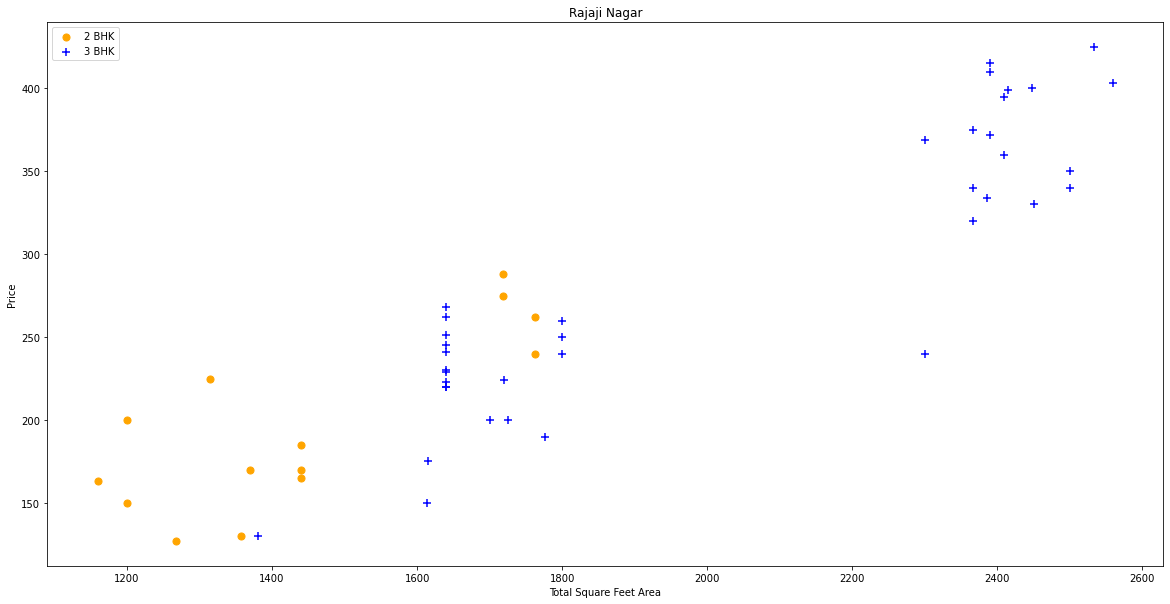

In [60]:
# a scatter plot to compare the prices of 2 & 3 bhk houses

def scatter_plot_chart(data, location):
    bhk2 = data[(data.location == location) & (data.bhk == 2)]
    bhk3 = data[(data.location == location) & (data.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] == (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'orange', label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker= '+', color = 'blue', label = '3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
scatter_plot_chart(data7, "Rajaji Nagar")

#here we can see the 2 bhk properties having more price than the 3 bhk properties maked in blue

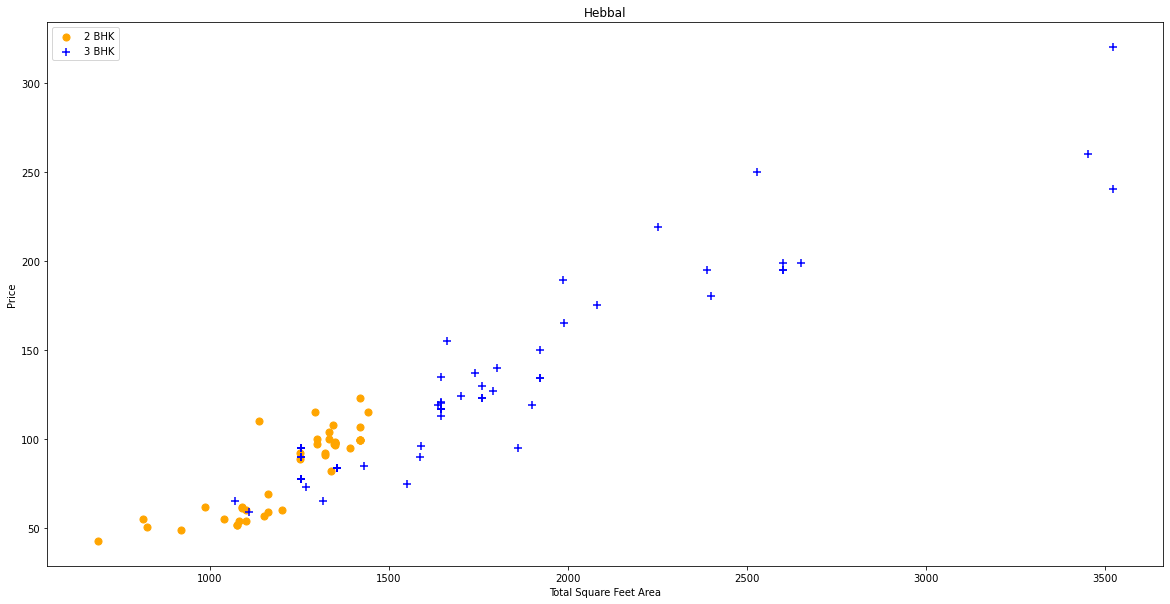

In [61]:
def scatter_plot_chart(data, location):
    bhk2 = data[(data.location == location) & (data.bhk == 2)]
    bhk3 = data[(data.location == location) & (data.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] == (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'orange', label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker= '+', color = 'blue', label = '3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
scatter_plot_chart(data7, "Hebbal")

#for another location hebbal

# we should also remove properties where for same location, the price of eg. 3 bedroom apartments is less than 2 bedroom apartments(with same sq ft. area). So, for a given location, we will build a dictionary of stats per bhk, i.e.

#       {
            '1' : {
                    'mean' : 4000,
                    'std' : 2000,
                    'count' : 34
                   },
             '2' : {
                    'mean' : 4300,
                    'std' : 2300,
                    'count' : 22
                    },
                    
#       }


# now we can remove those 2 bhk apartments whose pricea-per_sqft is less then mean price_per_sqft of 1 bhk apartments


In [67]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk -1)
            if stats and stats['count']> 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return data.drop(exclude_indices, axis = 'index')

            

In [68]:
data8 = remove_bhk_outliers(data7)
data8.shape

(7329, 7)

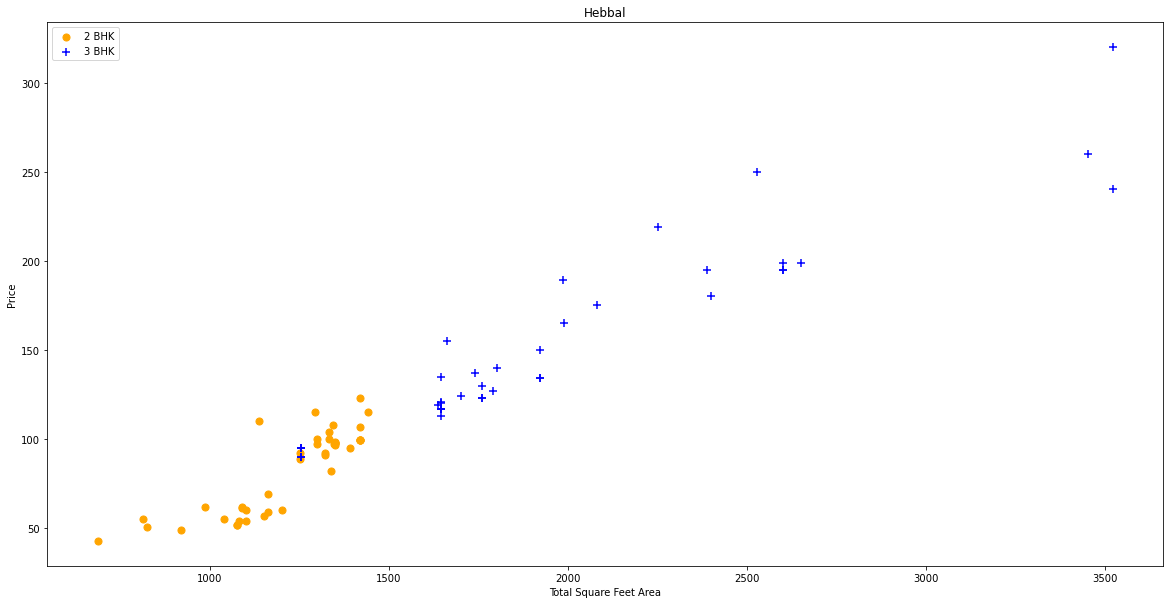

In [69]:
scatter_plot_chart(data8, "Hebbal")
#notice that all the apartments with less price of 3bhk are removed

Text(0, 0.5, 'Count')

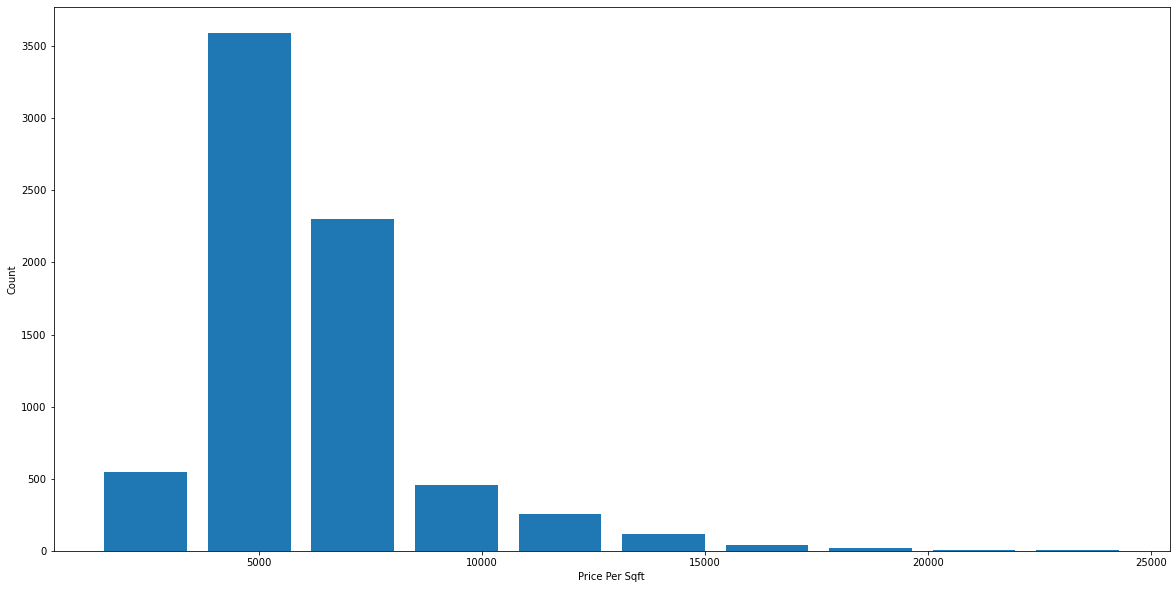

In [71]:
#to see hw many apartments are there per sqft area plot a histogram

import matplotlib
matplotlib.rcParams['figure.figsize'] = [ 20, 10]
plt.hist(data8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel('Count')


#histogram shows no of datapoints in that category

In [72]:
data8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [73]:
data8[data8.bath > 10]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


TypeError: 'str' object is not callable

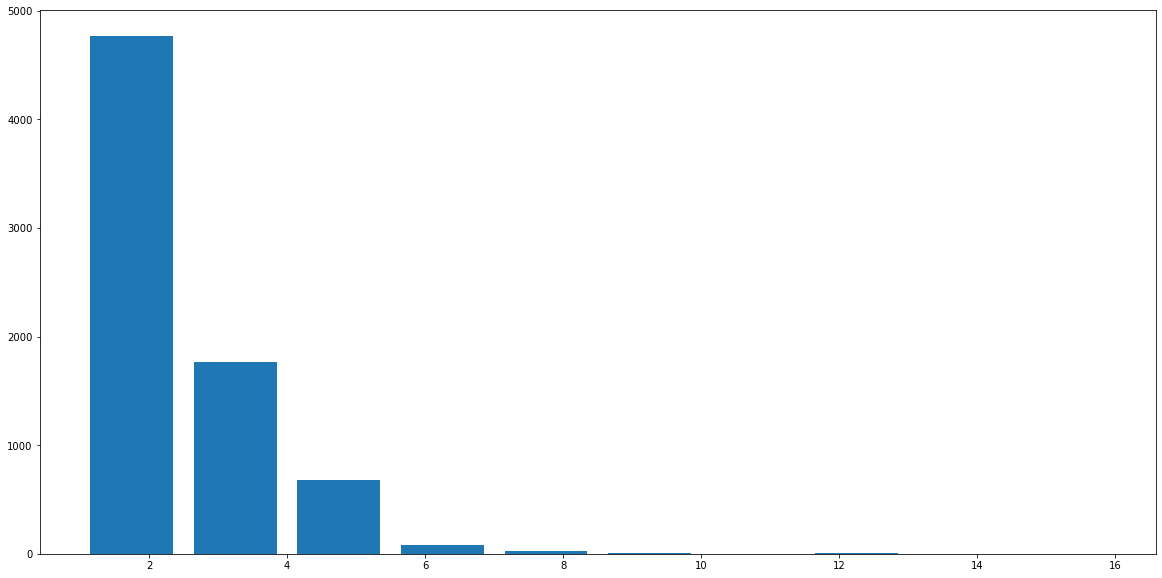

In [79]:
plt.hist(data8.bath, rwidth = 0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [81]:
#to remove outliers if the no. of bathrooms is greater than no of bedrooms + 2

data8[data8.bath > data8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [82]:
data9 = data8[data8.bath < data8.bhk+2]
data9.shape

(7251, 7)

In [85]:
#dropping price_per_sqft column as we created it only for the outlier detection and analysis
#dfropping size column as we have bhk column

data10 = data9.drop(['size','price_per_sqft'],axis='columns')
data10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [87]:
#using one hot encoding to convert location string column into numeric for the machine learning model

dummies = pd.get_dummies(data10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
data11 = pd.concat([data10, dummies.drop('others', axis='columns')], axis='columns')

In [90]:
data11.head()

#all the location columns are dummy encoded as numerics and appended to our main dataframe


,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
#now we dont need the location column as it is dummy encoded so dropping it

data12 = data11.drop('location', axis='columns')
data12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
data12.shape

(7251, 245)

In [94]:
#model building

#dropping the price column as it is dependednt

X = data12.drop('price', axis="columns")
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
Y = data12.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [100]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.8452277697874278

In [103]:
#k-fold cross validation
#shufflesplit will randomize the sample so each fold has equal distribution of data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score( LinearRegression(), X, Y, cv=cv)

#here also score is almost 80 in all folds

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [111]:
#using GridSearchCv for selecting the best regression algorithm which will give the best score
#we are specifying the parameters also here to know the best parameters for that algorithm(hyper parameter training)

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        }, 
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        }, 
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }, 
    }

    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_names, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_names,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
    })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.718891,"{'criterion': 'mse', 'splitter': 'random'}"


In [113]:
#So best model is linear regression only..
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [126]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 1:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [127]:
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

5

In [128]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.49904677167729

In [129]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

86.805193951943

In [130]:
predict_price('Indira Nagar', 1000, 3, 3)

184.58430202033597

In [131]:
predict_price('Indira Nagar', 1000, 2, 2)

181.27815484007027

In [132]:
import pickle
with open('bangalore_house_price_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [134]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))